In [1]:
path_autompg = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
path_img = "https://images.pexels.com/photos/417173/pexels-photo-417173.jpeg?cs=srgb&dl=pexels-pixabay-417173.jpg&fm=jpg"
path_img1 = "https://images.pexels.com/photos/417173/pexels-photo-417173.jpeg?cs=srgb&dl=pexels-pixabay-417173.jpg&fm=jpg"

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv(path_autompg,sep="\s+",header=None,na_values="?")
data.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
data.shape

(398, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       392 non-null    float64
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [6]:
data_new=data.iloc[:,:6]
data_new

,0,1,2,3,4,5
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6
394,44.0,4,97.0,52.0,2130.0,24.6
395,32.0,4,135.0,84.0,2295.0,11.6
396,28.0,4,120.0,79.0,2625.0,18.6


In [7]:
data_new.drop(1,axis=1,inplace=True)
data_new

,0,2,3,4,5
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5
...,...,...,...,...,...
393,27.0,140.0,86.0,2790.0,15.6
394,44.0,97.0,52.0,2130.0,24.6
395,32.0,135.0,84.0,2295.0,11.6
396,28.0,120.0,79.0,2625.0,18.6


In [8]:
data_new.corr()

,0,2,3,4,5
0,1.000000,-0.804203,-0.778427,-0.831741,0.420289
2,-0.804203,1.000000,0.897257,0.932824,-0.543684
3,-0.778427,0.897257,1.000000,0.864538,-0.689196
4,-0.831741,0.932824,0.864538,1.000000,-0.417457
5,0.420289,-0.543684,-0.689196,-0.417457,1.000000


In [9]:
corr_mat = data_new.corr()

In [10]:
eig_val,eig_vec=np.linalg.eig(corr_mat)

In [11]:
eig_val

array([3.92532216, 0.71311838, 0.22560735, 0.05313873, 0.08281339])

In [12]:
eig_vec

array([[-0.44398055,  0.30765313,  0.83792834,  0.0737807 ,  0.02575531],
       [ 0.48328322, -0.13344367,  0.37434585, -0.6229128 , -0.4695476 ],
       [ 0.48462287,  0.12458701,  0.19924835, -0.15520992,  0.82814777],
       [ 0.47138045, -0.32401573,  0.30832321,  0.74261265, -0.16210348],
       [-0.33505186, -0.8758049 ,  0.15158556, -0.17598975,  0.25837077]])

In [13]:
np.argsort(eig_val)

array([3, 4, 2, 1, 0], dtype=int64)

In [14]:
sorted_index=np.argsort(eig_val)[::-1]
sorted_index

array([0, 1, 2, 4, 3], dtype=int64)

In [15]:
eig_val[sorted_index]

array([3.92532216, 0.71311838, 0.22560735, 0.08281339, 0.05313873])

In [16]:
sorted_eig_vec=eig_vec[:,sorted_index]
sorted_eig_vec

array([[-0.44398055,  0.30765313,  0.83792834,  0.02575531,  0.0737807 ],
       [ 0.48328322, -0.13344367,  0.37434585, -0.4695476 , -0.6229128 ],
       [ 0.48462287,  0.12458701,  0.19924835,  0.82814777, -0.15520992],
       [ 0.47138045, -0.32401573,  0.30832321, -0.16210348,  0.74261265],
       [-0.33505186, -0.8758049 ,  0.15158556,  0.25837077, -0.17598975]])

# Apply Kaiser Criteria ($\lambda \ge 1$)

In [17]:
eig_val[eig_val>1]

array([3.92532216])

In [18]:
len(eig_val[eig_val>1])

1

In [19]:
v1=sorted_eig_vec[:,range(len(eig_val[eig_val>1]))]
v1

array([[-0.44398055],
       [ 0.48328322],
       [ 0.48462287],
       [ 0.47138045],
       [-0.33505186]])

In [20]:
PC1= data_new.dot(v1)
PC1

,0
0,1851.073735
1,1979.407086
2,1834.363489
3,1826.736292
4,1828.524181
...,...
393,1407.274381
394,1048.341793
395,1169.675702
396,1314.989446


In [21]:
import statsmodels.formula.api as sm

In [22]:
data_ols=data.iloc[:,:6]
data_ols.drop(1,axis=1,inplace=True)

In [23]:
data_ols.head()

,0,2,3,4,5
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5


In [24]:
var_names=["mpg","disp","hp","wt","acc"]
data_ols.columns = var_names

In [25]:
formula = 'mpg~'+"+".join(var_names[1:])
formula

'mpg~disp+hp+wt+acc'

In [26]:
model = sm.ols(formula=formula,data=data_ols)

In [27]:
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Sun, 26 Jun 2022   Prob (F-statistic):          9.63e-102
Time:                        21:28:43   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.2511      2.456     18.424      0.000      40.422      50.080
disp          -0.0060      0.007     -0.894      0.372      -0.019       0.007
hp            -0.0436      0.017     -2.631      0.009      -0.076      -0.011
wt            -0.0053      0.001     -6.512      0.000      -0.007      -0.004
acc           -0.0231      0.126     -0.184      0.854      -0.270       0.224
==============================================================================
Omnibus:                       38.359   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.333
Skew:                           0.715   Prob(JB):                     7.13e-12
Kurtosis:                       4.049   Cond. No.                     3.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
len(PC1)

398

In [29]:
data_ols_pca = pd.DataFrame(columns=["mpg","PC1"])

In [30]:
data_ols_pca["mpg"]=data.iloc[:,0]
data_ols_pca["PC1"]=PC1

In [31]:
data_ols_pca.shape

(398, 2)

In [32]:
data_ols_pca

,mpg,PC1
0,18.0,1851.073735
1,15.0,1979.407086
2,18.0,1834.363489
3,16.0,1826.736292
4,17.0,1828.524181
...,...,...
393,27.0,1407.274381
394,44.0,1048.341793
395,32.0,1169.675702
396,28.0,1314.989446


In [33]:
formula_new="mpg~PC1"

In [34]:
model2=sm.ols(formula=formula_new,data=data_ols_pca)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     926.5
Date:                Sun, 26 Jun 2022   Prob (F-statistic):          4.49e-105
Time:                        21:28:43   Log-Likelihood:                -1122.7
No. Observations:                 392   AIC:                             2249.
Df Residuals:                     390   BIC:                             2257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.9031      0.737     60.932      0.000      43.454      46.352
PC1           -0.0140      0.000    -30.439      0.000      -0.015      -0.013
==============================================================================
Omnibus:                       42.191   Durbin-Watson:                   0.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.580
Skew:                           0.736   Prob(JB):                     7.00e-14
Kurtosis:                       4.243   Cond. No.                     5.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='PC1', ylabel='mpg'>

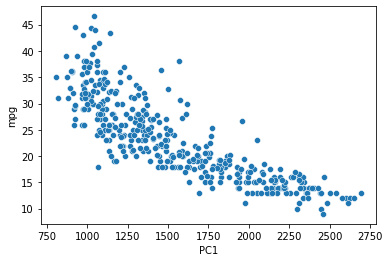

In [36]:
sns.scatterplot(x="PC1",y="mpg",data=data_ols_pca)

In [37]:
np.array(corr_mat).trace()

5.0

In [38]:
eig_val[eig_val>1]

array([3.92532216])

In [39]:
3.92532216/5.0

0.785064432

In [40]:
eig_val.cumsum()/5

array([0.78506443, 0.92768811, 0.97280958, 0.98343732, 1.        ])

# SVD is available in Numpy and Scipy 

In [2]:
import os
os.system("wget {}".format(path_img))

1

In [13]:
import urllib.request
req = urllib.request.Request(
    path_img, 
    data=None, 
    headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    }
)

with open('001.jpg','wb') as f:
    f.write(urllib.request.urlopen(req).read())
f.close()
# print(f.read().decode('utf-8'))

In [18]:
img_1 = plt.imread('001.jpg')
img_1

array([[[ 85, 133, 181],
        [ 97, 143, 192],
        [ 99, 146, 192],
        ...,
        [  0, 114, 176],
        [  0, 110, 172],
        [  0, 113, 175]],

       [[ 99, 145, 194],
        [100, 146, 195],
        [ 96, 143, 189],
        ...,
        [  1, 115, 177],
        [  0, 112, 174],
        [  1, 115, 177]],

       [[ 94, 140, 189],
        [ 92, 139, 185],
        [ 93, 140, 186],
        ...,
        [  1, 115, 177],
        [  0, 114, 176],
        [  2, 116, 178]],

       ...,

       [[  4,  40,  66],
        [  2,  38,  64],
        [  3,  40,  66],
        ...,
        [ 17,  59,  84],
        [ 14,  58,  83],
        [ 11,  55,  80]],

       [[  2,  36,  63],
        [  1,  37,  63],
        [  5,  41,  67],
        ...,
        [ 18,  60,  85],
        [ 10,  54,  79],
        [ 12,  56,  81]],

       [[  0,  34,  61],
        [  1,  35,  62],
        [  6,  42,  68],
        ...,
        [ 13,  55,  80],
        [  2,  46,  71],
        [ 12,  56,  81]]

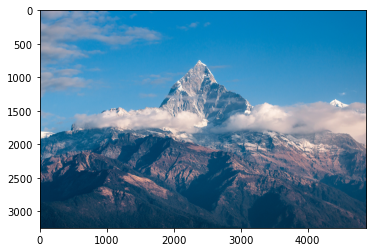

In [17]:
plt.imshow(img_1)

In [47]:
img = plt.imread("pexels-pixabay-417173.jpg")

In [48]:
img

array([[[ 85, 133, 181],
        [ 97, 143, 192],
        [ 99, 146, 192],
        ...,
        [  0, 114, 176],
        [  0, 110, 172],
        [  0, 113, 175]],

       [[ 99, 145, 194],
        [100, 146, 195],
        [ 96, 143, 189],
        ...,
        [  1, 115, 177],
        [  0, 112, 174],
        [  1, 115, 177]],

       [[ 94, 140, 189],
        [ 92, 139, 185],
        [ 93, 140, 186],
        ...,
        [  1, 115, 177],
        [  0, 114, 176],
        [  2, 116, 178]],

       ...,

       [[  4,  40,  66],
        [  2,  38,  64],
        [  3,  40,  66],
        ...,
        [ 17,  59,  84],
        [ 14,  58,  83],
        [ 11,  55,  80]],

       [[  2,  36,  63],
        [  1,  37,  63],
        [  5,  41,  67],
        ...,
        [ 18,  60,  85],
        [ 10,  54,  79],
        [ 12,  56,  81]],

       [[  0,  34,  61],
        [  1,  35,  62],
        [  6,  42,  68],
        ...,
        [ 13,  55,  80],
        [  2,  46,  71],
        [ 12,  56,  81]]

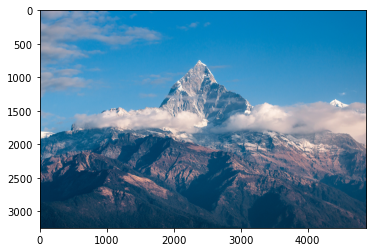

In [49]:
plt.imshow(img)

In [50]:
img_scaled = img/255

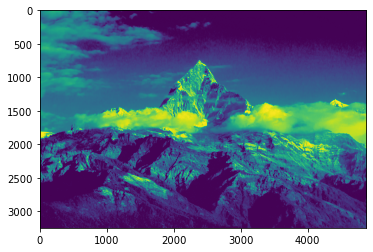

In [51]:
img_layer0=img_scaled[:,:,0]
plt.imshow(img_layer0)

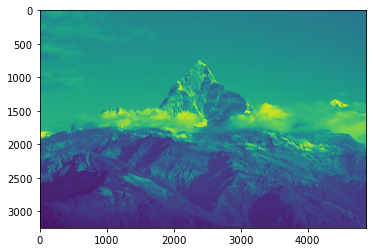

In [52]:
img_layer1=img_scaled[:,:,1]
plt.imshow(img_layer1)

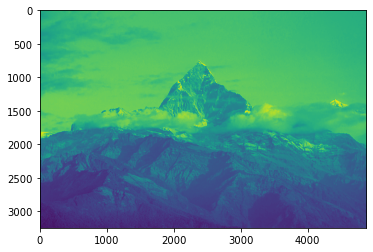

In [53]:
img_layer2=img_scaled[:,:,2]
plt.imshow(img_layer2)

In [56]:
k=100
u,s,v_t = np.linalg.svd(img_layer0,full_matrices=False)

In [55]:
(u.shape, s.shape,v_t.shape) 

((3248, 3248), (3248,), (3248, 4872))

# Recreate original image with k=100

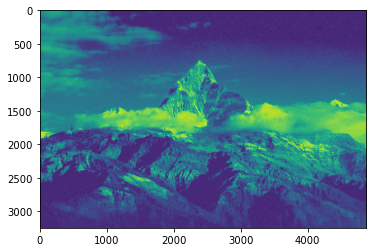

In [57]:
img_layer0_recreated=(u[:,:k].dot(np.diag(s[:k]))).dot(v_t[:k,:])
plt.imshow(img_layer0_recreated)

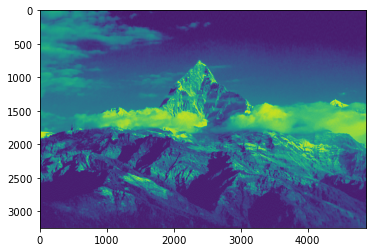

In [58]:
k=200
img_layer0_recreated=(u[:,:k].dot(np.diag(s[:k]))).dot(v_t[:k,:])
plt.imshow(img_layer0_recreated)

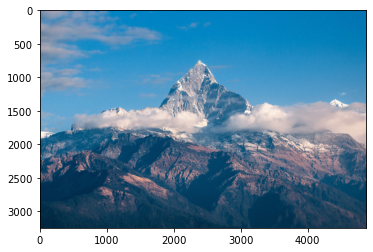

In [62]:
img_recreated = np.zeros(img.shape)
k=200
for layer in range(3):
    u,s,v_t = np.linalg.svd(img_scaled[:,:,layer],full_matrices=False)
    img_layer=(u[:,:k].dot(np.diag(s[:k]))).dot(v_t[:k,:])
    img_layer=np.clip(img_layer,0,1)
    img_recreated[:,:,layer]=img_layer
plt.imshow(img_recreated)

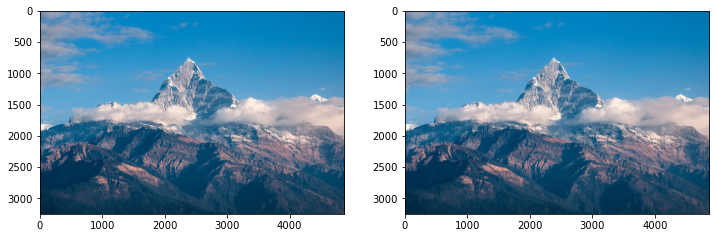

In [63]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(img_scaled)
plt.subplot(1,2,2)
plt.imshow(img_recreated)

In [64]:
np.product(img_scaled.shape)

47472768

In [65]:
3248*200 + 4872*200 + 200

1624200

# percentage of save of memory_space

In [67]:
1-(1624200/47472768)

0.9657867011251587